In [223]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import dataset
cardata = pd.read_csv('CarPrice_Assignment.csv')

In [224]:
# Top rows
cardata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [225]:
# Check the no of records
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [226]:
# Requirement - You need to consider only company name as the independent variable for model building. 
cardata['CarName'] = cardata.CarName.str.split().str.get(0)

In [227]:
# Cleanup data
cardata.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [228]:
cardata.CarName = cardata.CarName.replace(['maxda'], 'mazda')
cardata.CarName = cardata.CarName.replace(['Nissan'], 'nissan')
cardata.CarName = cardata.CarName.replace(['porcshce'], 'porsche')
cardata.CarName = cardata.CarName.replace(['toyouta'], 'toyota')
cardata.CarName = cardata.CarName.replace(['vokswagen','volkswagen'], 'vw')
cardata.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vw', 'volvo'], dtype=object)

In [229]:
# Data Preparation

# Dropping columns
cardata.drop(['car_ID'],axis=1,inplace=True)

In [154]:
# convert categorical variables
cardata.apply(pd.Series.nunique)
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [230]:
# Putting feature variable to cardata
newcardata = cardata.iloc[:,:24]
# Putting feature variable to cardata
price = cardata.iloc[:, 24]

In [231]:
newcardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [232]:
# Create dummies for all categorical variables
newcardata = pd.get_dummies(newcardata, columns=['CarName','symboling','fueltype','aspiration','doornumber','carbody',
                                   'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], 
                           prefix=['CarName','symboling','fueltype','aspiration','doornumber','carbody',
                                   'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], 
                           drop_first=True)

In [233]:
newcardata.info()
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
newcardata = newcardata.apply(normalize)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
CarName_audi             205 non-null uint8
CarName_bmw              205 non-null uint8
CarName_buick            205 non-null uint8
CarName_chevrolet        205 non-null uint8
CarName_dodge            205 non-null uint8
CarName_honda            205 non-null uint8
CarName_isuzu            205 non-null uint8
C

In [234]:
#Imports
from sklearn.cross_validation import train_test_split 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  

In [235]:
# Function for calculating vif value
def vif_cal(x_vars):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [236]:
# Splitting the data into training and test
# Iteration1
X_train, X_test, y_train, y_test = train_test_split(newcardata, price, train_size=0.7 , random_state=100)

In [237]:
# Importing RFE and LinearRegression
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False  True False  True  True  True  True False False False False
 False False  True False False False False False False False False False
 False  True False  True False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False  True  True  True False  True  True
  True False False False False False False False]
[ 4 14  1 10  1  1  1  1 19  8  6 29 20 30  1 38 17 12 15 39 21 34 52  3
 36  1 11  1 47  9 45 37 13 35 31 41 43 42 44 23  5 46 25 24 26 27 51 33
  1  7  2 48 16 40  1  1  1 22  1  1  1 28 32 18 53 49 50 54]


In [238]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.03e-70
Time:                        18:19:59   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     128   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.347e+

In [166]:
df1 = newcardata[['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke'
        , 'CarName_bmw', 'CarName_peugeot', 'CarName_porsche', 'enginelocation_rear'
        , 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three'
        , 'cylindernumber_twelve', 'cylindernumber_two']]

# Calculating Vif value
vif_cal(df1)

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


,Var,Vif
9,enginetype_rotor,inf
14,cylindernumber_two,inf
2,enginesize,13.870000
1,curbweight,9.670000
11,cylindernumber_four,8.030000
0,carwidth,5.750000
3,boreratio,3.620000
8,enginelocation_rear,3.030000
7,CarName_porsche,2.920000
10,cylindernumber_five,2.470000


In [239]:
# High Vif for few variables
newcardata.drop(['enginetype_rotor','cylindernumber_two','enginesize', 
                 'curbweight', 'cylindernumber_four', 'carwidth'],axis=1,inplace=True)

In [240]:
# Splitting the data into training and test
# Iteration2
X_train, X_test, y_train, y_test = train_test_split(newcardata, price, train_size=0.7 , random_state=100)

In [241]:
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True False False False False False  True False  True False False  True
  True False False False False  True False False False False  True False
  True False False False False False False False False False False False
 False False False  True  True  True  True False False  True  True False
 False False False False False  True False False False False False False
 False False]
[ 1 44  3 40 39 32  1 31  1  6 23  1  1  4  5 10 11  1 15 46  2 12  1  9
  1 14 45  7  8 37 13 20 16 18 19 17 33 42 41  1  1  1  1 35 34  1  1 29
 26 25 30 22 38  1 21 28 43 36 47 24 27 48]


In [176]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     99.85
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.23e-62
Time:                        17:23:05   Log-Likelihood:                -1301.8
No. Observations:                 143   AIC:                             2636.
Df Residuals:                     127   BIC:                             2683.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.339e+04 

In [242]:
df1 = newcardata[['wheelbase', 'horsepower', 'citympg', 'CarName_bmw', 'CarName_buick'
        , 'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche', 'carbody_hardtop'
        , 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginelocation_rear'
        , 'enginetype_dohcv', 'cylindernumber_three']]

# Calculating Vif value
vif_cal(df1)

,Var,Vif
10,carbody_sedan,11.73
9,carbody_hatchback,9.91
11,carbody_wagon,5.83
1,horsepower,5.27
7,CarName_porsche,5.04
12,enginelocation_rear,4.50
2,citympg,4.08
0,wheelbase,3.40
8,carbody_hardtop,2.40
13,enginetype_dohcv,2.29


In [243]:
# High Vif for few variables
newcardata.drop(['carbody_sedan','carbody_hatchback','carbody_wagon', 
                 'horsepower', 'CarName_porsche'],axis=1,inplace=True)

In [244]:
# Splitting the data into training and test
# Iteration3
X_train, X_test, y_train, y_test = train_test_split(newcardata, price, train_size=0.7 , random_state=100)

In [245]:
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[ True False  True  True False  True False False  True False  True  True
 False False False False False False False False False  True False False
 False  True False False False False False False False False  True False
 False False False False  True  True False False False False False  True
 False  True False False  True False False False False]
[ 1 24  1  1 21  1 20  8  1 23  1  1 11  4 10  9 25 12 41  2  7  1  5  3
 26  1  6 29 13 19 15 17 18 16  1 27 36 40 34 38  1  1 28 35 32 33 22  1
 14  1 30 39  1 42 31 37 43]


In [181]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     59.66
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.52e-49
Time:                        17:27:13   Log-Likelihood:                -1339.8
No. Observations:                 143   AIC:                             2710.
Df Residuals:                     128   BIC:                             2754.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.335e+

In [246]:
df1 = newcardata[['wheelbase', 'carheight', 'boreratio', 'compressionratio', 'highwaympg'
        , 'CarName_bmw', 'CarName_buick', 'CarName_peugeot', 'CarName_subaru'
        , 'fueltype_gas', 'enginelocation_rear', 'enginetype_dohcv', 'cylindernumber_six'
        , 'cylindernumber_twelve', 'fuelsystem_idi']]

# Calculating Vif value
vif_cal(df1)

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


,Var,Vif
9,fueltype_gas,inf
14,fuelsystem_idi,inf
3,compressionratio,56.490000
0,wheelbase,4.550000
4,highwaympg,3.460000
2,boreratio,2.380000
1,carheight,1.970000
12,cylindernumber_six,1.950000
7,CarName_peugeot,1.690000
6,CarName_buick,1.630000


In [247]:
# High Vif for few variables
newcardata.drop(['fueltype_gas','fuelsystem_idi','compressionratio'],axis=1,inplace=True)

In [248]:
# Splitting the data into training and test
# Iteration4
X_train, X_test, y_train, y_test = train_test_split(newcardata, price, train_size=0.7 , random_state=100)

In [249]:
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[ True False  True  True False False False False False False  True False
  True False False False False False  True  True  True False  True False
  True  True False False False False False False False False False False
 False False  True  True False False False False False  True False  True
 False False False False False False]
[ 1 22  1  1 16 20 10  8 18 19  1  3  1  5  4 21  6 38  1  1  1  2  1 24
  1  1 26  7 15 11 12 14 13 23 33 35 31 32  1  1 34 30 28 29 17  1  9  1
 37 25 39 36 27 40]


In [250]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     49.32
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.59e-45
Time:                        18:21:27   Log-Likelihood:                -1346.8
No. Observations:                 143   AIC:                             2726.
Df Residuals:                     127   BIC:                             2773.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.338e+

In [188]:
df1 = newcardata[['wheelbase', 'carheight', 'boreratio', 'CarName_buick', 'CarName_dodge'
        , 'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot', 'CarName_renault'
        , 'CarName_subaru', 'CarName_toyota', 'enginelocation_rear', 'enginetype_dohcv'
        , 'cylindernumber_six', 'cylindernumber_twelve']]

# Calculating Vif value
vif_cal(df1)

,Var,Vif
0,wheelbase,4.61
1,carheight,2.26
2,boreratio,2.07
13,cylindernumber_six,1.65
11,enginelocation_rear,1.64
7,CarName_peugeot,1.54
3,CarName_buick,1.50
9,CarName_subaru,1.35
6,CarName_nissan,1.27
5,CarName_mitsubishi,1.24


In [251]:
# High P for car CarName_dodge
newcardata.drop(['CarName_dodge'],axis=1,inplace=True)

In [252]:
# Splitting the data into training and test
# Iteration5
X_train, X_test, y_train, y_test = train_test_split(newcardata, price, train_size=0.7 , random_state=100)

lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

# summary of our linear model
print(lm.summary())

[False  True False False False False False False  True  True  True False
 False False  True False False False False False False False False False
 False  True False  True  True  True  True  True False False False False
 False  True  True False False False False False  True False  True False
 False False False False False]
[ 7  1  8  2 28 15  4  3  1  1  1 21 29 25  1 30 37 13 23 18 22 20  9  5
 24  1 12  1  1  1  1  1 14 35 36 19 27  1  1 33 31  6 17 11  1 10  1 32
 16 38 34 26 39]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     70.11
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.08e-54
Time:                        18:21:39   Log-Likelihood:                -1324.8
No. Observations:                 143  

In [191]:
df1 = newcardata[['carlength', 'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_jaguar'
        , 'CarName_volvo', 'symboling_-1', 'symboling_0', 'symboling_1'
        , 'symboling_2', 'symboling_3', 'enginelocation_rear', 'enginetype_dohcv'
        , 'cylindernumber_six', 'cylindernumber_twelve']]

# Calculating Vif value
vif_cal(df1)

,Var,Vif
7,symboling_0,25.16
8,symboling_1,22.75
9,symboling_2,15.71
10,symboling_3,13.77
6,symboling_-1,9.10
5,CarName_volvo,2.26
0,carlength,2.04
4,CarName_jaguar,1.79
13,cylindernumber_six,1.76
14,cylindernumber_twelve,1.57


In [253]:
# High Vif for multiple values
newcardata.drop(['symboling_0','symboling_1','symboling_2','symboling_3','symboling_-1'],axis=1,inplace=True)

In [193]:
# Splitting the data into training and test
# Iteration6
X_train, X_test, y_train, y_test = train_test_split(newcardata, price, train_size=0.7 , random_state=100)

lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

# summary of our linear model
print(lm.summary())

[False  True False  True False  True False False  True  True  True False
 False False  True False False False False False False  True False  True
 False False False False False False False False  True  True False False
  True False  True  True False  True False False False False False False]
[12  1  2  1 17  1 25  6  1  1  1 24 11 28  1 29 32  3 15 13 16  1 21  1
 19 27 18  4 30 26 20 31  1  1 22 23  1 14  1  1  5  1  9  8 33 10  7 34]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     75.86
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.08e-55
Time:                        17:39:14   Log-Likelihood:                -1324.7
No. Observations:                 143   AIC:                             2679.
Df Resi

In [254]:
df1 = newcardata[['carlength', 'boreratio', 'peakrpm', 'CarName_audi', 'CarName_bmw'
        , 'CarName_buick', 'CarName_jaguar', 'CarName_renault', 'CarName_subaru'
        , 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_ohcf', 'cylindernumber_five'
        , 'cylindernumber_six', 'cylindernumber_twelve']]

# Calculating Vif value
vif_cal(df1)

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


,Var,Vif
8,CarName_subaru,inf
9,enginelocation_rear,inf
11,enginetype_ohcf,inf
0,carlength,2.870000
12,cylindernumber_five,2.720000
1,boreratio,2.590000
3,CarName_audi,2.420000
13,cylindernumber_six,1.760000
5,CarName_buick,1.730000
6,CarName_jaguar,1.730000


In [255]:
# High Vif for few variables
newcardata.drop(['CarName_subaru','enginelocation_rear','enginetype_ohcf'],axis=1,inplace=True)


In [196]:
# Splitting the data into training and test
# Iteration7
X_train, X_test, y_train, y_test = train_test_split(newcardata, price, train_size=0.7 , random_state=100)

lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
# summary of our linear model
print(lm.summary())

[False  True False  True False  True  True False  True  True  True False
 False False  True False False False False False False False False False
 False False False False  True False False  True False False False  True
  True  True  True  True False False False False False]
[ 8  1  7  1 15  1  1 18  1  1  1 27  2 26  1 23 29 11 12 24 13  6 21 20
 28 17 14 25  1 22 19  1  9 10 16  1  1  1  1  1  3 30  5  4 31]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     58.72
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.29e-49
Time:                        17:41:21   Log-Likelihood:                -1336.0
No. Observations:                 143   AIC:                             2704.
Df Residuals:                     

In [256]:
df1 = newcardata[['carlength', 'boreratio', 'peakrpm', 'citympg', 'CarName_audi'
        , 'CarName_bmw', 'CarName_buick', 'CarName_jaguar', 'carbody_hardtop'
        , 'enginetype_dohcv', 'cylindernumber_five', 'cylindernumber_six', 'cylindernumber_three'
        , 'cylindernumber_twelve', 'fuelsystem_2bbl']]

# Calculating Vif value
vif_cal(df1)

,Var,Vif
3,citympg,3.36
0,carlength,3.06
10,cylindernumber_five,2.72
4,CarName_audi,2.47
1,boreratio,2.41
6,CarName_buick,1.83
7,CarName_jaguar,1.72
11,cylindernumber_six,1.68
2,peakrpm,1.61
13,cylindernumber_twelve,1.59


In [257]:
# High P for few variables
newcardata.drop(['citympg','cylindernumber_five','cylindernumber_three'],axis=1,inplace=True)


In [199]:
# Splitting the data into training and test
# Iteration8
X_train, X_test, y_train, y_test = train_test_split(newcardata, price, train_size=0.7 , random_state=100)

lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
# summary of our linear model
print(lm.summary())

[False  True  True  True False  True False  True  True  True False False
 False  True False False False False False False  True False False False
 False False False  True False False  True  True False False  True  True
  True False False False False False]
[ 8  1  1  1 19  1  3  1  1  1 23  6 25  1 20 26 12 10  2 13  1 16 22 17
 18 14 24  1 21 15  1  1  9 11  1  1  1  4 27  7  5 28]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     60.05
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           3.78e-50
Time:                        17:44:48   Log-Likelihood:                -1334.6
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     127   BIC:                 

In [258]:
df1 = newcardata[['carlength', 'carheight', 'boreratio', 'peakrpm', 'CarName_audi'
        , 'CarName_bmw', 'CarName_buick', 'CarName_jaguar', 'CarName_renault'
        , 'carbody_hardtop', 'enginetype_dohcv', 'enginetype_l', 'cylindernumber_six'
        , 'cylindernumber_twelve', 'fuelsystem_2bbl']]

# Calculating Vif value
vif_cal(df1)

,Var,Vif
0,carlength,3.76
2,boreratio,2.03
1,carheight,1.82
7,CarName_jaguar,1.77
13,cylindernumber_twelve,1.60
12,cylindernumber_six,1.58
14,fuelsystem_2bbl,1.53
6,CarName_buick,1.42
3,peakrpm,1.38
11,enginetype_l,1.27


In [259]:
# High P value for few variables
newcardata.drop(['carheight','CarName_renault','enginetype_l'],axis=1,inplace=True)


In [338]:
# Splitting the data into training and test
# Iteration9

X_train, X_test, y_train, y_test = train_test_split(newcardata, price, train_size=0.7 ,test_size = 0.3)

lm = LinearRegression()
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe, has_constant='add')

X_test_rfe = X_test[col]
X_test_rfe = sm.add_constant(X_test_rfe, has_constant='add')

lm = sm.OLS(y_train,X_train_rfe).fit()
# summary of linear model
print(lm.summary())

[False  True  True False  True False False  True  True False False False
  True False False False False False False False False False False False
 False  True False False  True False False  True  True False False False
 False False False]
[ 4  1  1  9  1 12  2  1  1 29 15 20  1 28 18 14  3  8 13 22  7 17 25 16
 27  1 26  5  1 10 21  1  1 11 23 30 24 19  6]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     73.99
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           3.71e-49
Time:                        19:05:00   Log-Likelihood:                -1358.8
No. Observations:                 143   AIC:                             2740.
Df Residuals:                     132   BIC:                             2772.
Df Model:

In [339]:
df1 = newcardata[['carlength', 'boreratio', 'peakrpm', 'CarName_bmw', 'CarName_buick'
        , 'CarName_jaguar', 'carbody_hardtop', 'enginetype_dohcv', 'cylindernumber_six'
        , 'cylindernumber_twelve']]

# Calculating Vif value
vif_cal(df1)

,Var,Vif
0,carlength,2.04
1,boreratio,1.79
5,CarName_jaguar,1.71
9,cylindernumber_twelve,1.56
8,cylindernumber_six,1.42
4,CarName_buick,1.31
3,CarName_bmw,1.24
2,peakrpm,1.17
6,carbody_hardtop,1.15
7,enginetype_dohcv,1.06


In [345]:
# The iteration looks good
# Making predictions

y_pred = lm.predict(X_test_rfe)

print(y_pred)
# print(y_test)

28     10748.405605
58     12108.058960
180    21251.897763
108    13199.596804
69     36718.221046
158     7523.850826
153     7494.568584
161     7753.795628
136    15490.410964
18      2017.040164
110    15471.129615
13     25236.468110
73     36283.508867
84     12081.089996
102    21675.831216
163     8200.654541
130    13044.539809
182     7612.014678
137    15490.410964
88     10488.334631
117    16201.774495
170    18379.964005
167    18379.964005
139     7943.931731
9      11313.307338
83     12081.089996
30      1928.891942
85     10402.519018
154     7494.568584
107    13766.128298
           ...     
142    10569.227849
20      6817.251126
42      9746.435458
90      6292.922741
60     11169.676261
10     22271.110895
174     9255.429116
165    12958.229785
176     8770.547979
146    11834.937964
125    14744.189821
8      14013.079941
22      6402.165627
0      10497.039651
27      6784.570129
48     32250.000000
160     7753.795628
62     11169.676261
14     27508.000921


In [346]:
# Now let's check how well our model is able to make predictions.

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0,0.5,'Car Price')

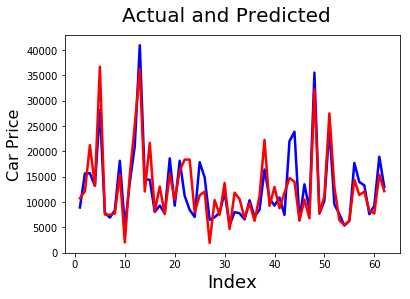

In [355]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)   

Text(0,0.5,'ytest-ypred')

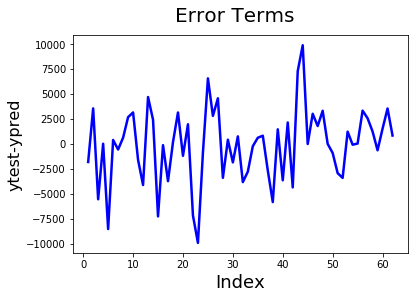

In [356]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)    

Text(0,0.5,'y_pred')

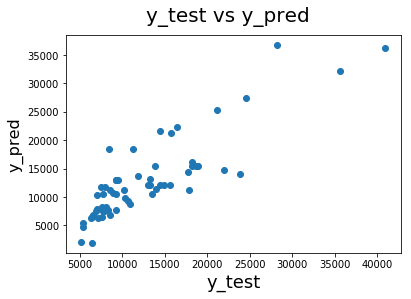

In [347]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                      # Y-label

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

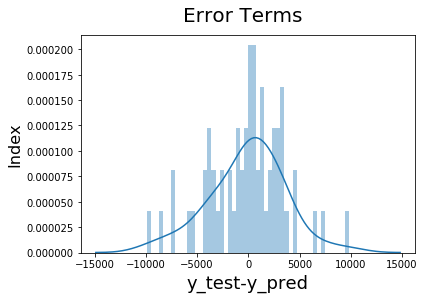

In [348]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)  

In [357]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 3680.3080399763658
